Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Paul de Graaf"
COLLABORATORS = ""

---

# Python assignment

The python assignment you can do either on your own or with one other student (i.e. max group size is 2 students).

The first cell of your notebook, should contain a table with the names and SNRs and ANRs of the group members, like so

|Name|SNR|ANR|
|----|---|----|
|jan boone|12345|u6786|
|adam smith|56789|u1234|



See [the webpage](https://janboone.github.io/applied-economics/#org065a005) for details of what we expect to see in this assignment.



# Research question (0.5 points)

Formulate the research question: what question do you want to answer in this assignment?

What is the effect of the common agricultural policy on welfare

# Motivation (0.5 points)

Motivate why this question is interesting.

the common agricultural policy is the policy of the EU regarding agriculture. This policy has been heavily debated inside and outside the european union. The goals of the CAP were to lower the dependency of countries outside the EU by increasing the price by income support and market measures. The importance of the subject is shown by the huge amount of money that is used to support EU Farmers. The EU has spended 57.9 billion euros while the total EU budget is 103.08 billion euros and the CAP has been changing over time. On 2 December 2021 there has been agreed upon a new CAP which will be practically implemented on the first of january 2023. So, it is important to understand the effects of certain policies.

# Method (0.5 points)

If you do a theory notebook (without external data; but perhaps with data that you simulate yourself), explain the methods that you use for the theory:

* is there an optimization problem underlying the notebook (like a firm maximizing profits)?
* do you calculate an equilibrium?
* what model do you use?

# [optional] Data [0.5 points]

**These 0.5 points are instead of the Method points above**

If you use data for your assignment, the Method part above does not apply. Instead,

* explain where your data come from (give a link or the code to download the data if you use an API like [wbdata](https://wbdata.readthedocs.io/en/stable/));
* explain the data cleaning and data normalization steps that you use;
* make sure that the data is in your github repository as well (or explain why this is not possible) so that we can replicate your analysis;
* what statistical methods do you use with the data.


YOUR ANSWER HERE

# Preview of the answers (0.5 points)

Summarize the results that you find and the answer to your research question.

YOUR ANSWER HERE

# Main assumptions (0.5 points)

What are the main assumptions that you need to answer the question? If you do a theory notebook, what are the main assumptions of your model? If you use data, what assumptions are needed by your estimation method.

YOUR ANSWER HERE

# Python code (6.5 points)


Give the python code in code cells and use markdown cells to explain why you code things in this way and what the outcomes are of the code cells.

Note that the explanation of your code is at least as important as the python code itself.

Create as many python and markdown cells as you need to explain things well.


In [171]:
import pandas as pd
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import matplotlib.patches as pl
import seaborn as sns
from scipy import stats, optimize
import random
import wbdata as wb

plt.style.use('seaborn')
%matplotlib inline

In [143]:
#first we start with a simple model of a supply and demand curve.
number_of_agents = 1000
number_of_goods = 100

valuations = np.array(sorted(pm.Normal.dist(0.35,0.1).random(size=number_of_agents),reverse = True))
print(valuations[number_of_goods])

valuations_s = np.array(sorted(pm.Normal.dist(0.35,0.1).random(size=number_of_agents),reverse = False))

def demand(p,valuations) : 
    return np.sum(valuations>p)

def supply(p,valuations_s) : 
    return np.sum(valuations_s<p)

0.48358155725108365


In [144]:
#solve for Q and P
def demand_minus_supply(p,valuations,valuations_s) : 
    return demand(p,valuations)-supply(p,valuations_s)

price = optimize.fsolve(lambda p: demand_minus_supply(p,valuations,valuations_s),0.5)
print(price)
Q = demand(price,valuations)
print(Q)

[0.3511713]
489


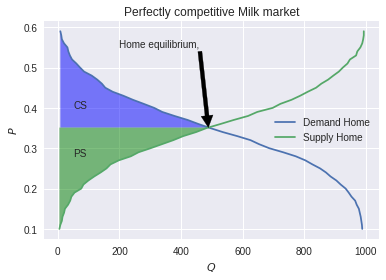

In [145]:
#plot formulas and surplusses
range_p = np.arange(0.1,0.6,0.01)
plt.plot([demand(p,valuations) for p in range_p], range_p,label="Demand Home")
plt.plot([supply(p,valuations_s)for p in range_p],range_p,label="Supply Home")
plt.fill_between([demand(p,valuations) for p in range_p], range_p, price , where=[(demand(p,valuations))<Q for p in range_p],facecolor='b',alpha=0.5,interpolate=True)
plt.fill_between([supply(p,valuations_s) for p in range_p], range_p, price , where=[(supply(p,valuations_s))<Q for p in range_p],facecolor='g',alpha=0.5, interpolate=True)
plt.legend(loc=5)
plt.xlabel('$Q$')
plt.ylabel('$P$')
plt.title('Perfectly competitive Milk market')
plt.annotate('Home equilibrium,', xy=(Q, price), xytext=(200, 0.55),arrowprops=dict(facecolor='black', shrink=1.5))
plt.annotate(("CS"),xy=(50,0.4))
plt.annotate(("PS"),xy=(50,0.28))
plt.show()

In [153]:
#calculate surplus
CS= np.sum(valuations[valuations> price]-price )
PS = np.sum(price -valuations_s[valuations_s<price])
TS=CS+PS
print([CS,PS,TS])

[39.942232858810954, 39.72960655700552, 79.67183941581646]


In [147]:
#we add a world price at 0.25. Now the price in the market will be 0.25 as well. we assume implicitely that the foreign farmers are more productive
worldprice=0.25
Q_demand = demand(worldprice,valuations)

Q_supply = supply(worldprice,valuations_s)
print([Q_demand,Q_supply])

[852, 158]


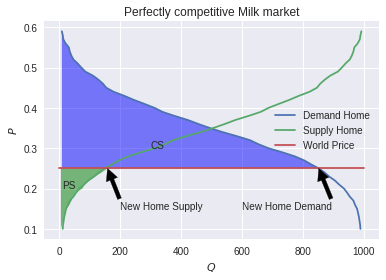

In [148]:
#we add the world price at which the whole market can be satisfied. 
range_p = np.arange(0.1,0.6,0.01)
plt.plot([demand(p,valuations) for p in range_p], range_p,label="Demand Home")
plt.plot([supply(p,valuations)for p in range_p],range_p,label="Supply Home")
plt.plot([0,1000],[worldprice,worldprice],label="World Price")
plt.fill_between([demand(p,valuations) for p in range_p], range_p, worldprice , where=[(demand(p,valuations))<Q_demand for p in range_p],facecolor='b',alpha=0.5,interpolate=True)
plt.fill_between([supply(p,valuations_s) for p in range_p], range_p, worldprice , where=[(supply(p,valuations_s))<Q_supply for p in range_p],facecolor='g',alpha=0.5, interpolate=True)
plt.legend(loc=5)
plt.xlabel('$Q$')
plt.ylabel('$P$')
plt.title('Perfectly competitive Milk market')
plt.annotate('New Home Demand', xy=(Q_demand, worldprice), xytext=(600, 0.15),arrowprops=dict(facecolor='black', shrink=1.5))
plt.annotate('New Home Supply', xy=(Q_supply, worldprice), xytext=(200, 0.15),arrowprops=dict(facecolor='black', shrink=1.5))
plt.annotate(("CS"),xy=(300,0.3))
plt.annotate(("PS"),xy=(10,0.2))
plt.show()

In [151]:
#calculate new surplusses
CS= np.sum(valuations[valuations> worldprice]-worldprice )
PS = np.sum(price -valuations_s[valuations_s<worldprice])
TS=CS+PS
print([CS,PS,TS])

[109.48706653733484, 24.56170421052355, 134.04877074785838]


In [175]:
#EU implements tariffs which increases the price but still below home equilibrium price. 
pricetax = worldprice*1.2
print(pricetax)
Q_demandt = demand(pricetax,valuations)
Q_supplyt = supply(pricetax,valuations_s)
world_supply=Q_demandt-Q_supplyt
tax=pricetax-worldprice
print([Q_demandt,Q_supplyt])

0.3
[687, 301]


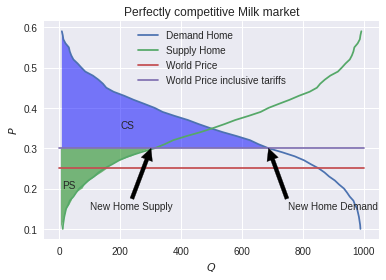

In [197]:
#we add a tax to the world price at which the whole market can be satisfied. 
range_p = np.arange(0.1,0.6,0.01)

plt.plot([demand(p,valuations) for p in range_p], range_p,label="Demand Home")
plt.plot([supply(p,valuations)for p in range_p],range_p,label="Supply Home")
plt.plot([0,1000],[worldprice,worldprice],label="World Price")
plt.plot([0,1000],[pricetax,pricetax],label="World Price inclusive tariffs")
plt.fill_between([demand(p,valuations) for p in range_p], range_p, pricetax , where=[(demand(p,valuations))<Q_demandt for p in range_p],facecolor='b',alpha=0.5,interpolate=True)
plt.fill_between([supply(p,valuations_s) for p in range_p], range_p, pricetax , where=[(supply(p,valuations_s))<Q_supplyt for p in range_p],facecolor='g',alpha=0.5, interpolate=True)
plt.legend(loc=9)
plt.xlabel('$Q$')
plt.ylabel('$P$')
plt.title('Perfectly competitive Milk market')
plt.annotate('New Home Demand', xy=(Q_demandt, pricetax), xytext=(750, 0.15),arrowprops=dict(facecolor='black', shrink=1.5))
plt.annotate('New Home Supply', xy=(Q_supplyt, pricetax), xytext=(100, 0.15),arrowprops=dict(facecolor='black', shrink=1.5))
plt.annotate(("CS"),xy=(200,0.35))
plt.annotate(("PS"),xy=(10,0.2))
plt.show()

# Sensitivity analysis (0.5 points)

If you do a theory notebook, program different values for the parameters, use different functional forms and solve your model again for these new values. Show that the outcomes are robust to such changes.

If you are using data, how sensitive are your results to outliers in the data, different choices when cleaning the data, different functional forms for the relations that you estimate.


In [2]:
# YOUR CODE HERE
raise NotImplementedError()

# Discussion and conclusion (0.5 points)

What did you find in the analysis above; what is the answer to the question you started out with.

What are weaknesses of your approach that can be improved upon in future research (e.g. in your thesis).


YOUR ANSWER HERE